# **Programa de Pós-Graduação em Engenharia Elétrica e Computação**
## Trabalho: Filtragem no Domínio da Frequência
### Marcelo Estevão da Silva (marcelo.estevao@alu.ufc.br)

In [1]:
# importando bibliotecas
import numpy as np
import pylab
import matplotlib.image as mpimg
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import skimage as sk
import math
from scipy import ndimage
from skimage.morphology import disk,octahedron,ball

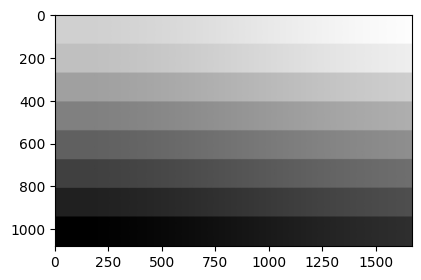

In [7]:
#importando e exibindo a imagem
img = plt.imread('grays.png')
fig, ax = plt.subplots(figsize=(5, 3))
ax.imshow(img)
plt.show()

In [36]:
# Dividindo os canais RGB da imagem
r_img = im[:, :,0] # canal vermelho
g_img = im[:, :,1] # canal verde
b_img = im[:, :,2] # canal azul

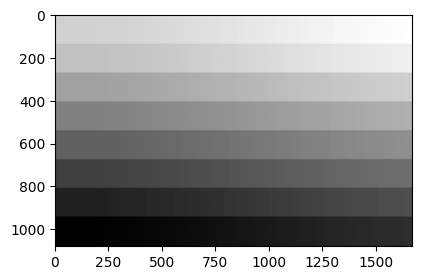

In [37]:
# convertendo a imagem em níveis de cinza
img_gray = 0.2125*r_img + 0.7154*g_img + 0.0721*b_img
fig, ax = plt.subplots(figsize=(5, 3))
ax.imshow(img_gray, 'gray')
plt.show()

In [38]:
# Obtendo a FFT bidimensional da imagem
img_fft2 = np.fft.fft2(img_gray)

# Centralizando as baixas frequências
img_fft2 = np.fft.fftshift(img_fft2)

## Filtro ideal

In [42]:
def ideal_mask(nx,ny,R):
    N,M = img_fft2.shape
    mask = np.zeros((N,M))
    disco  = disk(R)
    mask[nx - R:nx + R + 1,ny - R:ny + R + 1] = disco
    return mask

### 1. Filtro Passa-Baixa

#### Frequência 1

In [84]:
mask_pb = ideal_mask(540,834,5)
img_pb = img_fft2 * mask_pb
img_pb = np.fft.ifft2(img_pb)
img_pb = np.abs(img_pb)

Text(0.5, 1.0, 'Imagem final')

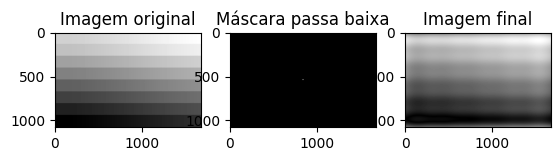

In [85]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pb,'gray')
plt.title('Máscara passa baixa')
plt.subplot(133)
plt.imshow(img_pb,'gray')
plt.title('Imagem final')

#### Frequência 2

In [86]:
mask_pb = ideal_mask(540,834,10)
img_pb = img_fft2 * mask_pb
img_pb = np.fft.ifft2(img_pb)
img_pb = np.abs(img_pb)

Text(0.5, 1.0, 'Imagem final')

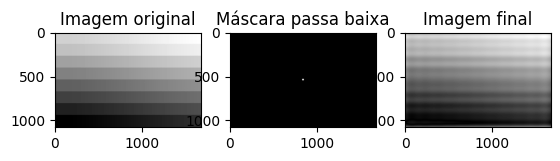

In [87]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pb,'gray')
plt.title('Máscara passa baixa')
plt.subplot(133)
plt.imshow(img_pb,'gray')
plt.title('Imagem final')

#### Frequência 3

In [88]:
mask_pb = ideal_mask(540,834,15)
img_pb = img_fft2 * mask_pb
img_pb = np.fft.ifft2(img_pb)
img_pb = np.abs(img_pb)

Text(0.5, 1.0, 'Imagem final')

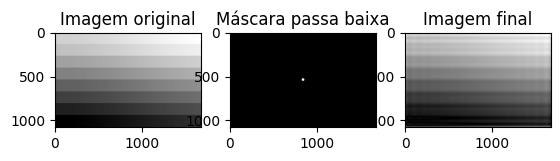

In [89]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pb,'gray')
plt.title('Máscara passa baixa')
plt.subplot(133)
plt.imshow(img_pb,'gray')
plt.title('Imagem final')

### 2. Filtro Passa Alta

#### Frequência 1

In [94]:
mask_pa = ideal_mask(540,834,5)
mask_pa = 1-mask_pa
img_pa = img_fft2 * mask_pa
img_pa = np.fft.ifft2(img_pa)
img_pa = np.abs(img_pa)

Text(0.5, 1.0, 'Imagem final')

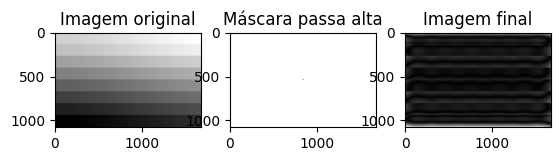

In [95]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pa,'gray')
plt.title('Máscara passa alta')
plt.subplot(133)
plt.imshow(img_pa,'gray')
plt.title('Imagem final')

#### Frequência 2

In [42]:
mask_pa = ideal_mask(540,834,10)
mask_pa = 1-mask_pa
img_pa = img_fft2 * mask_pa
img_pa = np.fft.ifft2(img_pa)
img_pa = np.abs(img_pa)

Text(0.5, 1.0, 'Imagem final')

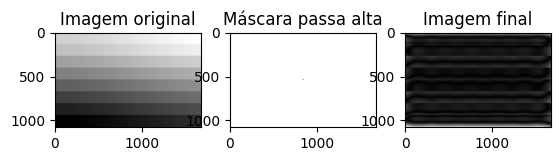

In [96]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pa,'gray')
plt.title('Máscara passa alta')
plt.subplot(133)
plt.imshow(img_pa,'gray')
plt.title('Imagem final')

#### Frequência 3

In [98]:
mask_pa = ideal_mask(540,834,15)
mask_pa = 1-mask_pa
img_pa = img_fft2 * mask_pa
img_pa = np.fft.ifft2(img_pa)
img_pa = np.abs(img_pa)

Text(0.5, 1.0, 'Imagem final')

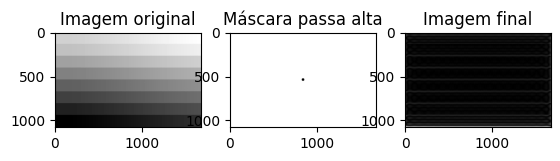

In [99]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pa,'gray')
plt.title('Máscara passa alta')
plt.subplot(133)
plt.imshow(img_pa,'gray')
plt.title('Imagem final')

### 3. Filtro Passa Faixa

In [107]:
def ideal_mask_passa_faixa(nx,ny,R,r):
    N,M = img_fft2.shape
    mask = np.zeros((N,M))
    disco  = disk(R)
    disco2 = disk(r)
    disco2 = 0
    mask[nx - R:nx + R + 1,ny - R:ny + R + 1] = disco
    mask[nx - r:nx + r + 1,ny - r:ny + r + 1] = disco2
    return mask

#### Frequência 1

In [113]:
mask_pf = ideal_mask_passa_faixa(540,834,20,10)
img_pf = img_fft2 * mask_pf
img_pf = np.fft.ifft2(img_pf)
img_pf = np.abs(img_pf)

Text(0.5, 1.0, 'Imagem final')

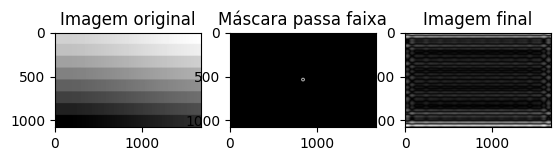

In [111]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pf,'gray')
plt.title('Máscara passa faixa')
plt.subplot(133)
plt.imshow(img_pf,'gray')
plt.title('Imagem final')

#### Frequência 2

In [114]:
mask_pf = ideal_mask_passa_faixa(540,834,20,10)
img_pf = img_fft2 * mask_pf
img_pf = np.fft.ifft2(img_pf)
img_pf = np.abs(img_pf)

Text(0.5, 1.0, 'Imagem final')

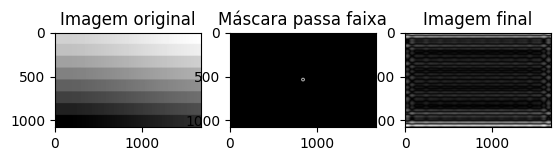

In [115]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pf,'gray')
plt.title('Máscara passa faixa')
plt.subplot(133)
plt.imshow(img_pf,'gray')
plt.title('Imagem final')

#### Frequência 3

In [59]:
mask_pf = ideal_mask_passa_faixa(540,834,40,10)
img_pf = img_fft2 * mask_pf
img_pf = np.fft.ifft2(img_pf)
img_pf = np.abs(img_pf)

Text(0.5, 1.0, 'Imagem final')

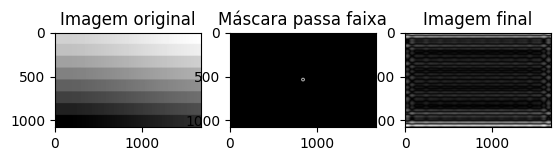

In [116]:
plt.subplot(131)
plt.imshow(img_gray,'gray')
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(mask_pf,'gray')
plt.title('Máscara passa faixa')
plt.subplot(133)
plt.imshow(img_pf,'gray')
plt.title('Imagem final')